# **Experiment Notebook**



In [54]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [55]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [56]:
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK



In [57]:
# Import custom package
!pip install my_krml_25552249==2025.0.7.1

---
## A. Project Description


In [58]:
# <Student to fill this section>
student_name = "Shawya Saito"
student_id = "25552249"

In [59]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [60]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [61]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [62]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [63]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [65]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [67]:
# Load training data
X_data = pd.read_csv('../../data/processed/X_data_reg.csv')
y_data = pd.read_csv('../../data/processed/y_data_reg.csv')

# Load test data
X_test = pd.read_csv('../../data/processed/X_test_reg.csv')
y_test = pd.read_csv('../../data/processed/y_test_reg.csv')

In [69]:
rolling_cols = [
    "precipitation_sum",
    "cloud_cover_mean",
    "temperature_2m_max",
    "temperature_2m_min",
    "relative_humidity_2m_mean",
    "wind_speed_10m_max"
]

windows = [3, 7]

for col in rolling_cols:
    for window in windows:
        if col == "precipitation_sum":
            df[f"{col}_rolling_sum_{window}"] = df[col].rolling(window).sum()
        else:
            df[f"{col}_rolling_mean_{window}"] = df[col].rolling(window).mean()

NameError: name 'df' is not defined

In [68]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          5111 non-null   object 
 1   temperature_2m_mean           5111 non-null   float64
 2   temperature_2m_max            5111 non-null   float64
 3   temperature_2m_min            5111 non-null   float64
 4   apparent_temperature_mean     5111 non-null   float64
 5   apparent_temperature_max      5111 non-null   float64
 6   apparent_temperature_min      5111 non-null   float64
 7   precipitation_sum             5111 non-null   float64
 8   rain_sum                      5111 non-null   float64
 9   precipitation_hours           5111 non-null   float64
 10  wind_speed_10m_max            5111 non-null   float64
 11  wind_gusts_10m_max            5111 non-null   float64
 12  shortwave_radiation_sum       5111 non-null   float64
 13  win

Split the data from 2014 onwards

In [42]:
# Make date datetime dtype
X_data['date'] = pd.to_datetime(X_data['date'])

# Filter for more than 2014
mask = X_data['date'].dt.year >= 2014
X_data = X_data[mask]
y_data = y_data[mask]

## D.z Final Selection of Features

In [43]:
# <Student to fill this section>

features_list = [
    'precipitation_sum',
    'precip_sum_lag1', 
    'precipitation_hours',
    'cloud_cover_mean',
    'wind_direction_10m_dominant',
    'vapour_pressure_deficit_max',
    'shortwave_radiation_sum',
    'wind_gusts_10m_min',
    'sunrise_hour',
]
target = ['precipitation_sum_next_3_days']


---
## G. Data Preparation for Modeling

### G.1 Split Datasets

Dataset has already been split.

In [44]:
# Select the relevant features
X_data = X_data[features_list]
X_test = X_test[features_list]

In [45]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3652 entries, 1459 to 5110
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precipitation_sum            3652 non-null   float64
 1   precip_sum_lag1              3652 non-null   float64
 2   precipitation_hours          3652 non-null   float64
 3   cloud_cover_mean             3652 non-null   float64
 4   wind_direction_10m_dominant  3652 non-null   float64
 5   vapour_pressure_deficit_max  3652 non-null   float64
 6   shortwave_radiation_sum      3652 non-null   float64
 7   wind_gusts_10m_min           3652 non-null   float64
 8   sunrise_hour                 3652 non-null   float64
dtypes: float64(9)
memory usage: 285.3 KB


---
## H. Save Datasets

> Do not change this code

In [40]:
# # Do not modify this code
# # Save training set
# try:
#   X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
#   y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

#   X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
#   y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

#   X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
#   y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
# except Exception as e:
#   print(e)

In [41]:
# # Do not modify this code
# # Save training set
# try:
#   X_data.to_csv('../../data/processed/X_data_reg.csv', index=False)
#   y_data.to_csv('../../data/processed/y_data_reg.csv', index=False)

#   X_test.to_csv('../../data/processed/X_test_reg.csv', index=False)
#   y_test.to_csv('../../data/processed/y_test_reg.csv', index=False)
# except Exception as e:
#   print(e)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [42]:
# RMSE main scoring metric, also look at mae and r^2

In [43]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
"""

In [44]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [45]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [46]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [47]:
# <Student to fill this section>

In [39]:
# 


In [46]:
tscv = TimeSeriesSplit(n_splits=5)
space = {
    'max_depth': hp.choice('max_depth', range(2, 10)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'n_estimators': hp.choice('n_estimators', range(50, 500)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)
}

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Objective function
def objective(params):
    rmses = []
    maes = []
    pct_errors = []

    for train_idx, val_idx in tscv.split(X_data):
        X_train, X_val = X_data.iloc[train_idx], X_data.iloc[val_idx]
        y_train, y_val = y_data.iloc[train_idx], y_data.iloc[val_idx]

        model = xgb.XGBRegressor(
            **params,
            random_state=33,
            objective='reg:squarederror',
            tree_method='hist',
            early_stopping_rounds=20,
            n_jobs=-1
        )

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        preds = model.predict(X_val)
        rmses.append(mean_squared_error(y_val, preds, squared=False))
        maes.append(mean_absolute_error(y_val, preds))

    return {
        'loss': np.mean(rmses),
        'status': STATUS_OK,
        'fold_rmse': rmses,
        'fold_mae': maes,
    }

# Run Hyperopt
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.91trial/s, best loss: 14.456801024858128]


In [48]:
# Best trial index
best_trial_idx = np.argmin([t['result']['loss'] for t in trials.trials])
best_trial = trials.trials[best_trial_idx]

# Fold-wise metrics for best hyperparameters
print("Fold-wise RMSE:", best_trial['result']['fold_rmse'])
print("Mean RMSE:", best_trial['result']['loss'])
print("Fold-wise MAE:", best_trial['result']['fold_mae'])
print("Mean MAE:", np.mean(best_trial['result']['fold_mae']))
print("\n")
# Best hyperparameters
print("Best hyperparameters:", best)

Fold-wise RMSE: [np.float64(14.446353475022873), np.float64(9.15109122220177), np.float64(17.73423733484695), np.float64(17.537732917021163), np.float64(13.414590175197892)]
Mean RMSE: 14.456801024858128
Fold-wise MAE: [np.float64(7.7844611804902115), np.float64(6.250484727528343), np.float64(7.91668511520524), np.float64(9.635265950435073), np.float64(7.6692123331971995)]
Mean MAE: 7.851221861371213


Best hyperparameters: {'colsample_bytree': np.float64(0.6790103695137412), 'learning_rate': np.float64(0.011747523230476637), 'max_depth': np.int64(3), 'n_estimators': np.int64(274), 'subsample': np.float64(0.8069638432245319)}


In [52]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [53]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [54]:
# <Student to fill this section>

In [49]:
# Map 'max_depth' choice index back to actual value
max_depth_choices = list(range(2, 10))

final_params = {
    'max_depth': max_depth_choices[int(best['max_depth'])],   # convert index to actual depth
    'n_estimators': int(best['n_estimators']),
    'learning_rate': float(best['learning_rate']),
    'subsample': float(best['subsample']),
    'colsample_bytree': float(best['colsample_bytree']),
    'random_state': 33,                                       
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'n_jobs': -1
}


In [50]:
# Instantiate final model
final_model = xgb.XGBRegressor(**final_params)

# Fit on all training data
final_model.fit(X_data, y_data)

# Predict on test set
y_pred = final_model.predict(X_test)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [42]:
# <Student to fill this section>

In [51]:
# RMSE
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# MAE
test_mae = mean_absolute_error(y_test, y_pred)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

Test RMSE: 13.957232171413025
Test MAE: 8.3574123145912


In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Test R-squared:", r2)

Test R-squared: 0.10287690162658691


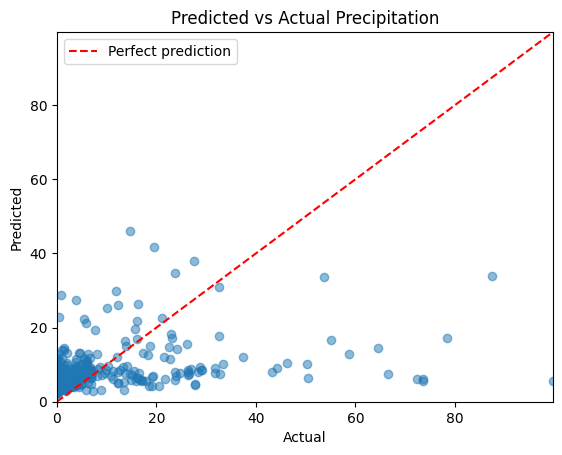

In [53]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Precipitation")

# Set same limits
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Perfect Prediction
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect prediction')
plt.legend()

plt.show()

In [22]:
y_test_series = y_test.squeeze()  # converts single-column DataFrame to Series

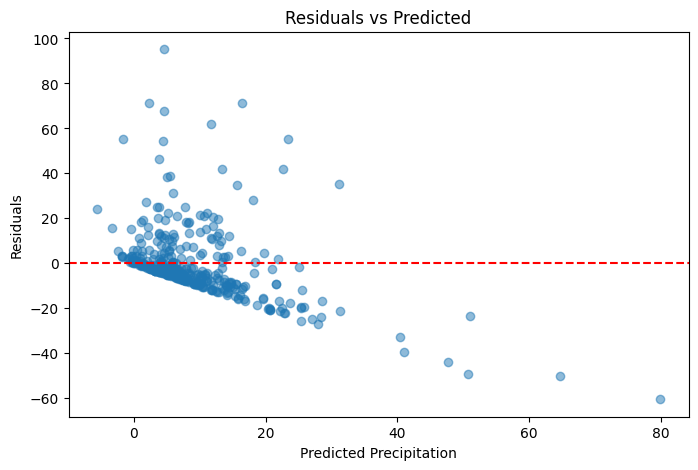

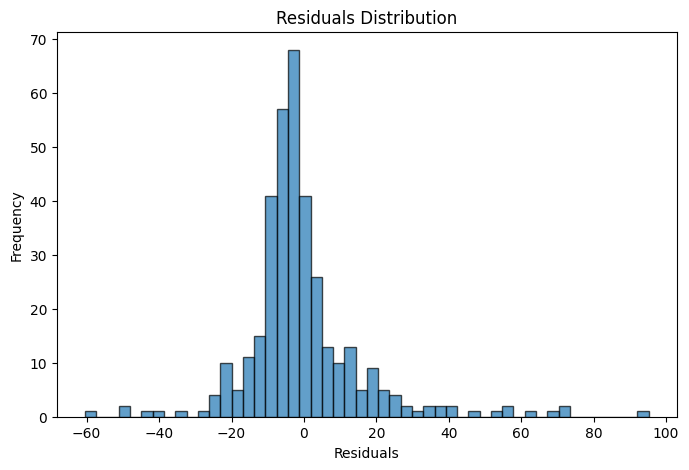

In [23]:
# Calculate residuals
residuals = y_test_series - y_pred

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Precipitation")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

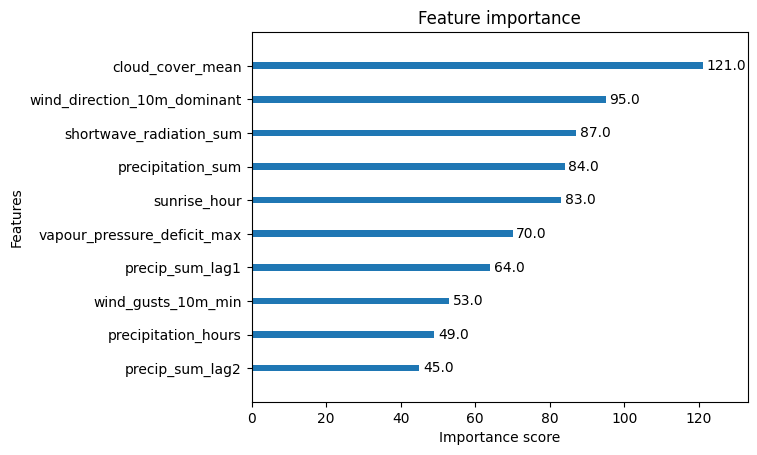

In [39]:
# Plot importances
ax = xgb.plot_importance(final_model)
ax.grid(False)
plt.show()

In [25]:
# Compute mean of training target
train_mean = y_data.mean()

# Predict test set with this mean
y_pred_baseline = np.full_like(y_test, fill_value=train_mean, dtype=np.float64)

# Evaluate
baseline_rmse = mean_squared_error(y_test, y_pred_baseline, squared=False)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)

print("Baseline RMSE on test set:", baseline_rmse)
print("Baseline MAE on test set:", baseline_mae)

Baseline RMSE on test set: 14.741065695171628
Baseline MAE on test set: 9.889686033532463


In [50]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [51]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [52]:
# <Student to fill this section>

In [53]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [54]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [55]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [56]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [57]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [58]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)